# Assignment 4

In [1]:
import gym
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pygame

from algorithms.planner import Planner
from algorithms.rl import RL

from examples.blackjack import Blackjack
from examples.test_env import TestEnv
from examples.grid_search import GridSearch
from examples.plots import Plots

from matplotlib.colors import LinearSegmentedColormap

### Environment Descriptions

In [2]:
# Environment Description

env1 = Blackjack()

map_24x24 = ["SFFFFFFFFFFFFHFFFFFFFFFF",
            "FFFFHFFFFFFFFHFFFFFHFFFF",
            "FFFFFFFFFFFFFFFFFFFFFFFF",
            "FFHFFFFFFFFFFFFFFFFFFFFF",
            "FFHFFFFFFFFFFFFFFFFFFFFF",
            "FFFHFFFFFFFFFFFFFFFFFFFF",
            "FFFFFFFFFFHFFFFFFFFFFFFF",
            "FFFFFFFFFFHFFFFFFFFFFFFF",
            "FFFFFFFFFFHFFFHFFFFFFFHF",
            "FFFFFFHFFFHFFHFFFFFFFFFF",
            "FFFFFFFHFFHFHFFFFFFFFFFF",
            "FFFFFFFFFFHFFFFFFFFFFFFF",
            "FFFFFFFFFFHFFFFFFFFFFFFF",
            "FFFFHFFFFFFFFFFFHFFFFFFF",
            "FFFHHFFFFFHFFFFHFFFFHFFF",
            "FFFFHFFFFHHFFFFFHFFFFFFF",
            "FFFFFFFFHFFFFFHFFGFFFFFF",
            "FFFFFFFFFFFFFFHFFFFFFFFF",
            "FFFFFFFHFFFFFFFFFFFFFFFF",
            "FFFHFFFFFFFFFFFFFFFFFFFF",
            "FFFFFFFFFFFFFFFFFFFFFFFF",
            "FFHFFFFFFFFFFFFFFFFFFFFF",
            "FHFFFFFFFFHFFFFFFFFFFFFF",
            "FFFFFFFFFFFFFFFFFHFFFFFF"]

env2 = gym.make('FrozenLake-v1', desc=map_24x24, is_slippery=True)

env2_small = gym.make('FrozenLake-v1', is_slippery=True)
env2_med = gym.make('FrozenLake8x8-v1', is_slippery=True)

### Custom Viz Defs

In [3]:
def forward_fill(data):
    i = data.shape[0] - 1
    while i > 0 and data[i] == 0:
        i -= 1
    fillVal = data[i]
    for j in range(i, data.shape[0]):
        data[j] = fillVal
    return i, data

In [4]:
def grid_values_heat_map_custom(data, label, size, plotSize=(16,10)):
    fig, ax = plt.subplots(figsize=plotSize)
    data = np.around(np.array(data).reshape(size), 2)
    df = pd.DataFrame(data=data)
    sns.heatmap(df, annot=True, ax=ax).set_title(label)
    plt.show()

In [5]:
def blackjack_heat_map_custom(data, label, plotSize=(10,14)):
    fig, ax = plt.subplots(figsize=plotSize)
    data = np.around(np.array(data).reshape((29, 10)), 2)
    df = pd.DataFrame(data=data)
    g = sns.heatmap(df, annot=True, ax=ax)
    g.set_title(label)
    ax.set_xlabel('Dealer Sum')
    ax.set_ylabel('Player Sum')
    g.set_xticklabels(['2', '3', '4', '5', '6', '7', '8', '9', '10', 'A'])
    g.set_yticklabels(['H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'BJ'])
    plt.show()

In [6]:
def grid_world_policy_plot_custom(holeData, data, label, size, plotSize=(12,10), holes=False):
    holeColor = (0.388, 0.388, 0.388, 1.0)
    leftColor = (0.8, 0.392, 0.392, 1.0)
    upColor = (0.922, 0.929, 0.612, 1.0)
    rightColor = (0.612, 0.929, 0.694, 1.0)
    downColor = (0.514, 0.667, 0.949, 1.0)


    fig, ax = plt.subplots(figsize=plotSize)
    if holes:
        data = (holeData != 0) * ([x+1 for x in data])
        data = np.around(np.array(data).reshape(size), 2)
        df = pd.DataFrame(data=data)
        my_colors = (holeColor, leftColor, downColor, rightColor, upColor)
        cmap = LinearSegmentedColormap.from_list('Custom', my_colors, len(my_colors))
        sns.heatmap(df, cmap=cmap, linewidths=1.0, ax=ax).set_title(label)
        colorbar = ax.collections[0].colorbar
        colorbar.set_ticks([0.4, 1.2, 2, 2.8, 3.6])
        colorbar.set_ticklabels(['Hole', 'Left', 'Down', 'Right', 'Up'])
        plt.show()
    else:    
        data = np.around(np.array(data).reshape(size), 2)
        df = pd.DataFrame(data=data)
        my_colors = (leftColor, downColor, rightColor, upColor)
        cmap = LinearSegmentedColormap.from_list('Custom', my_colors, len(my_colors))
        sns.heatmap(df, cmap=cmap, linewidths=1.0, ax=ax).set_title(label)
        colorbar = ax.collections[0].colorbar
        colorbar.set_ticks([0.39, 1.13, 1.87, 2.61])
        colorbar.set_ticklabels(['Left', 'Down', 'Right', 'Up'])
        plt.show()

In [7]:
def blackjack_policy_plot_custom(data, label, plotSize=(10, 14)):
    standColor = (0.58, 0.58, 0.58, 1.0)
    hitColor = (0.6, 0.831, 0.663, 1.0)

    fig, ax = plt.subplots(figsize=plotSize)
    data = np.around(np.array(data).reshape((29, 10)), 2)
    df = pd.DataFrame(data=data)
    my_colors = (standColor, standColor, standColor, hitColor, hitColor, hitColor)
    cmap = LinearSegmentedColormap.from_list('Custom', my_colors, len(my_colors))
    g = sns.heatmap(df, cmap=cmap, linewidths=1.0, ax=ax)
    g.set_title(label)
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([0.25, 0.75])
    colorbar.set_ticklabels(['Stand', 'Hit'])
    ax.set_xlabel('Dealer Sum')
    ax.set_ylabel('Player Sum')
    g.set_xticklabels(['2', '3', '4', '5', '6', '7', '8', '9', '10', 'A'])
    g.set_yticklabels(['H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'BJ'])
    plt.show()

In [8]:
def convergence_plot_max_V(data, label, plotSize=(12,10)):
    conv, maxData = forward_fill(np.max(data, axis=1))
    fig, ax = plt.subplots(figsize=plotSize)
    iterations = np.arange(1, data.shape[0] + 1)
    ax.plot(iterations, maxData)
    ax.axvline(x=conv)
    ax.set_title(label)
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Maximum V")
    plt.show()
    return conv

In [9]:
def convergence_plot_mean_V(data, label, plotSize=(12,10)):
    conv, meanData = forward_fill(np.mean(data, axis=1))
    fig, ax = plt.subplots(figsize=plotSize)
    iterations = np.arange(1, data.shape[0] + 1)
    ax.plot(iterations, meanData)
    ax.axvline(x=conv)
    ax.set_title(label)
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Mean V")
    plt.show()
    return conv

In [10]:
def convergence_plot_var_V(data, label, plotSize=(12,10)):
    conv, varData = forward_fill(np.var(data, axis=1))
    fig, ax = plt.subplots(figsize=plotSize)
    iterations = np.arange(1, data.shape[0] + 1)
    ax.plot(iterations, varData)
    ax.axvline(x=conv)
    ax.set_title(label)
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Maximum V")
    plt.show()
    return conv

In [11]:
def convergence_plot_delta_V(data, label, plotSize=(12,10)):
    conv, meanData = forward_fill(np.mean(data, axis=1))
    delta = np.zeros(data.shape[0] - 1)
    for i in range(data.shape[0] - 1):
        delta[i] = (meanData[i + 1] - meanData[i]) * data.shape[1]
    fig, ax = plt.subplots(figsize=plotSize)
    iterations = np.arange(1, delta.size + 1)
    ax.plot(iterations, delta)
    ax.axvline(x=conv)
    ax.set_title(label)
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Delta Sum")
    plt.show()
    return conv

In [12]:
def convergence_plot_max_V_mult(data, label, plotSize=(12,10)):
    fig, ax = plt.subplots(figsize=plotSize)
    iterations = np.arange(1, data[0].shape[0] + 1)
    for i in range(len(data)):
        conv, maxData = forward_fill(np.max(data[i], axis=1))
        ax.plot(iterations, maxData)
    ax.set_title(label)
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Maximum V")
    plt.show()
    return conv

In [13]:
def convergence_plot_mean_V_mult(data, label, plotSize=(12,10)):
    fig, ax = plt.subplots(figsize=plotSize)
    iterations = np.arange(1, data[0].shape[0] + 1)
    for i in range(len(data) - 1):
        conv, meanData = forward_fill(np.mean(data[i], axis=1))
        ax.plot(iterations, meanData)
    ax.set_title(label)
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Mean V")
    plt.show()
    return conv

In [14]:
def convergence_plot_delta_V_mult(data, label, plotSize=(12,10)):
    fig, ax = plt.subplots(figsize=plotSize)
    iterations = np.arange(1, data[0].shape[0])
    for j in range(len(data)):
        conv, meanData = forward_fill(np.mean(data[j], axis=1))
        delta = np.zeros(data[j].shape[0] - 1)
        for i in range(data[j].shape[0] - 1):
            delta[i] = (meanData[i + 1] - meanData[i]) * data[j].shape[1]
        ax.plot(iterations, delta)
    ax.set_title(label)
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Delta Sum")
    plt.show()
    return conv

In [15]:
def get_policy(pi, size):
    policy = [0] * size
    for i in range(size):
        policy[i] = pi(i)
    return policy

### Value Iteration

In [16]:
# Value Iteration

vV1, vV_track1, vpi1 = Planner(env1.P).value_iteration(n_iters=50)
vV2, vV_track2, vpi2 = Planner(env2.P).value_iteration(n_iters=1000)
vV2_med, vV_track2_med, vpi2_med = Planner(env2_med.P).value_iteration(n_iters=1000)
vV2_small, vV_track2_small, vpi2_small = Planner(env2_small.P).value_iteration(n_iters=1000)

runtime = 0.03 seconds
runtime = 4.71 seconds
runtime = 0.54 seconds
runtime = 0.12 seconds


C:\Users\ashi9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\algorithms\planner.py:76: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")


In [17]:
# Get Policies

vpolicy1 = get_policy(vpi1, 290)
vpolicy2 = get_policy(vpi2, 576)
vpolicy2_med = get_policy(vpi2_med, 64)
vpolicy2_small = get_policy(vpi2_small, 16)

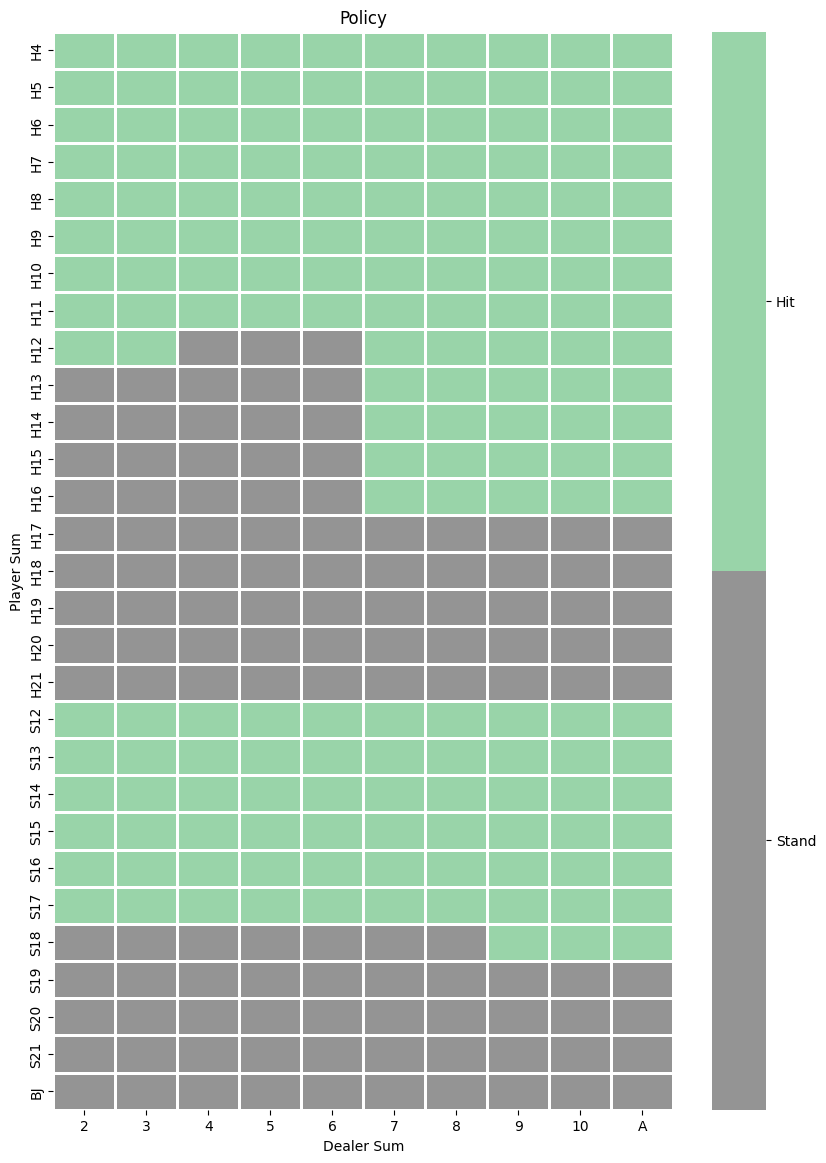

In [18]:
# BJ Plots

blackjack_heat_map_custom(vV1, "State Values")
blackjack_policy_plot_custom(vpolicy1, "Policy")

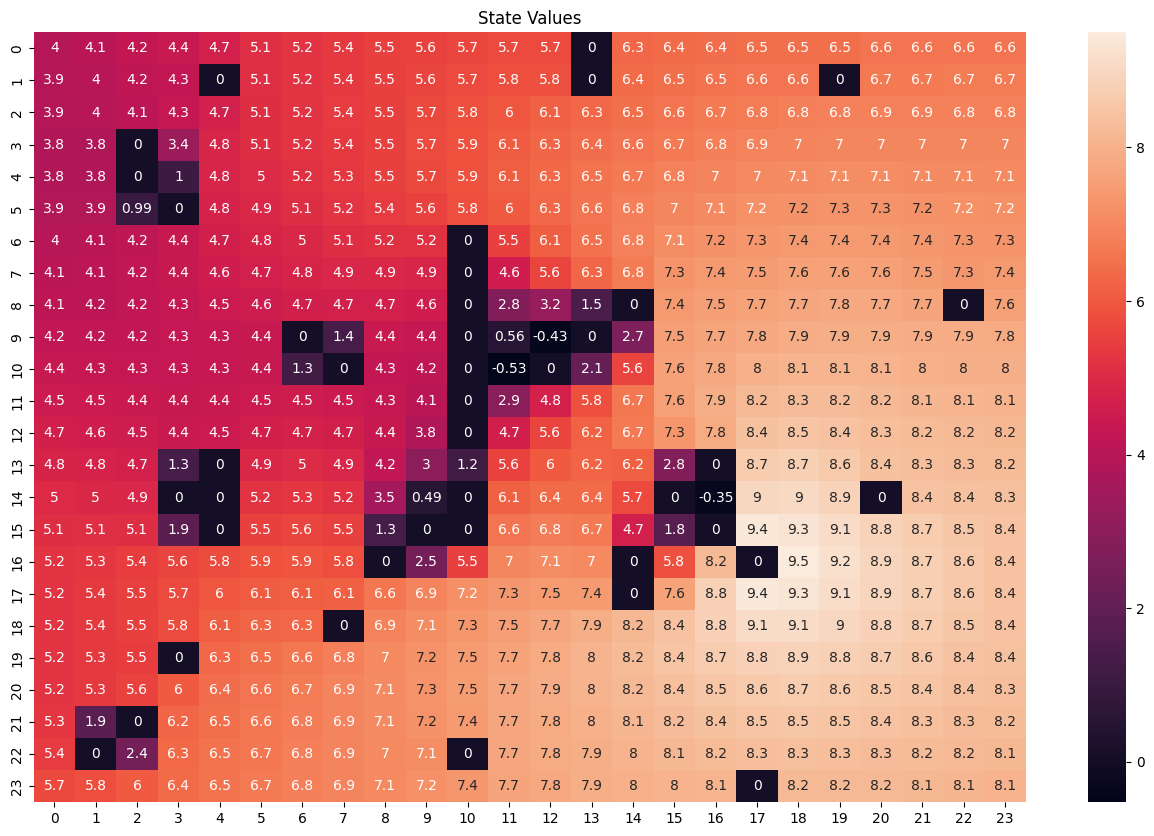

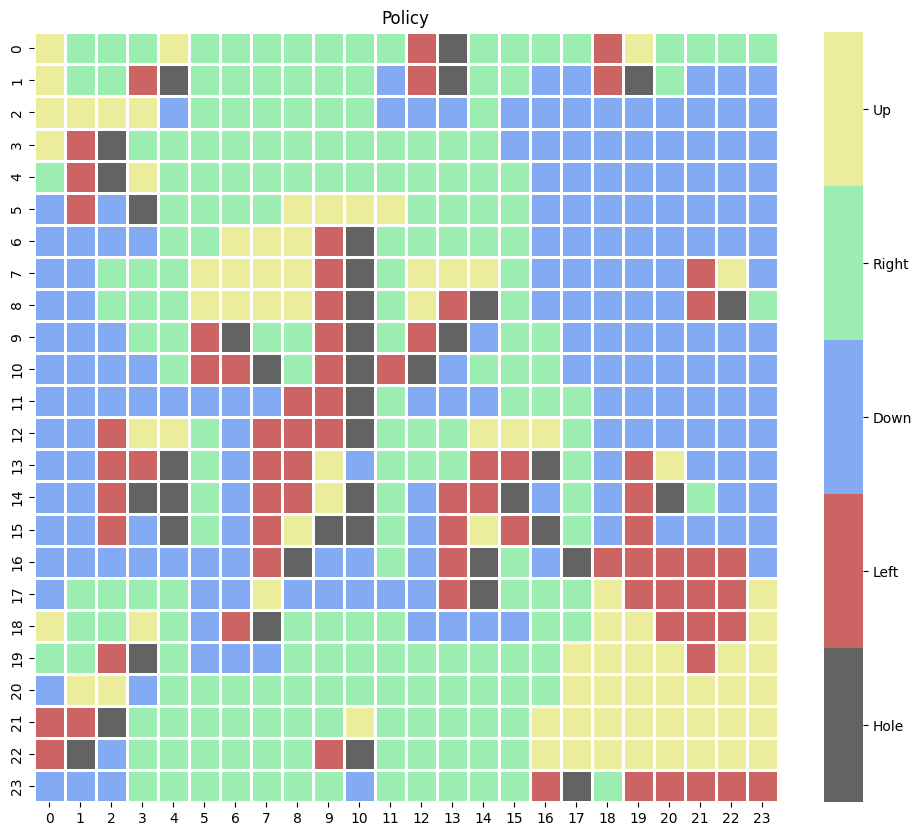

In [20]:
# FL Plots

grid_values_heat_map_custom(vV2, "State Values", (24, 24))
grid_world_policy_plot_custom(vV2, vpolicy2, "Policy", size=(24,24), holes=True)

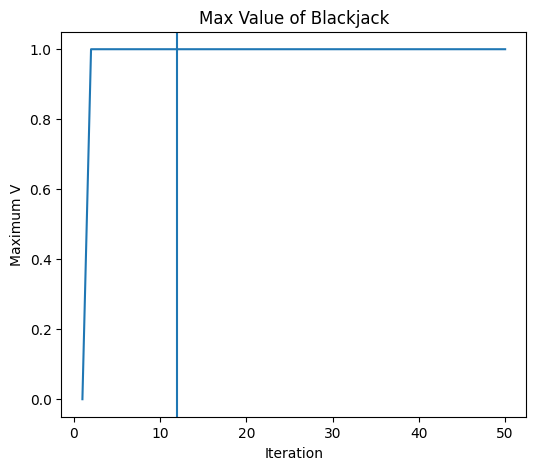

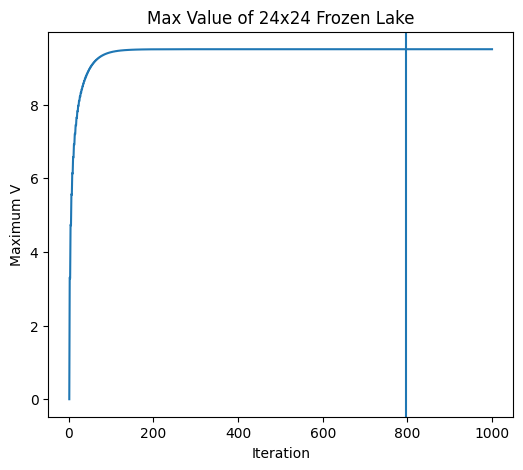

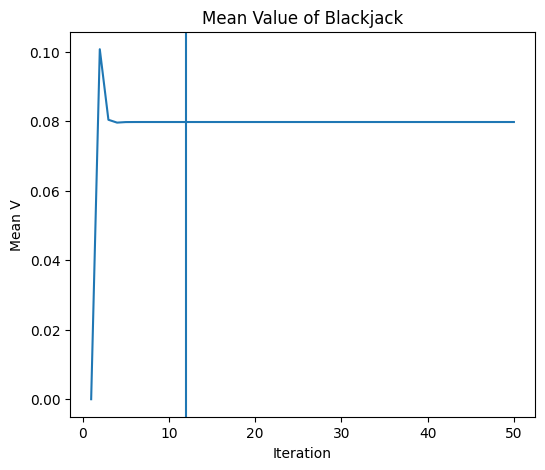

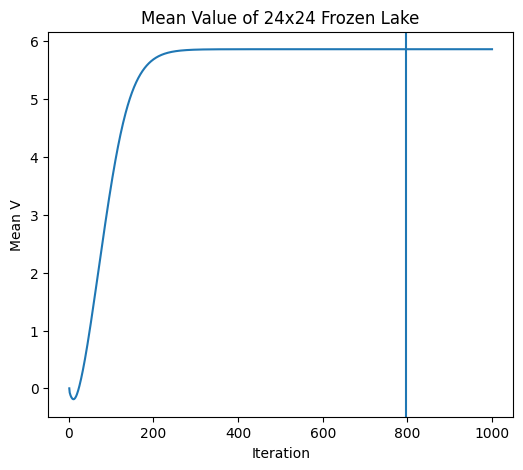

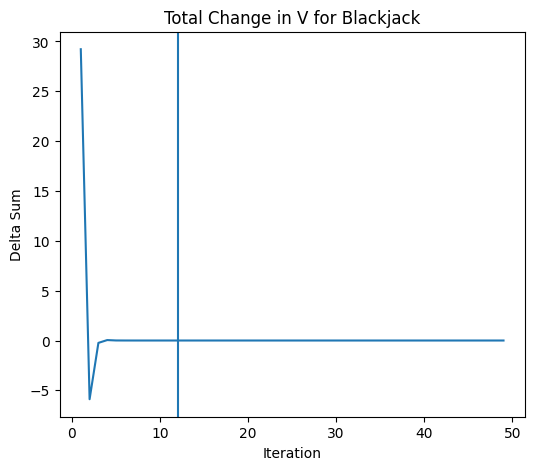

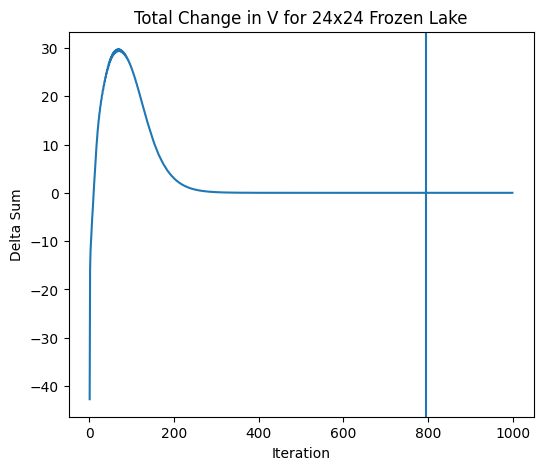

In [21]:
# Convergence Plots

convMax1 = convergence_plot_max_V(vV_track1, "Max Value of Blackjack", plotSize=(6,5))
convMax2 = convergence_plot_max_V(vV_track2, "Max Value of 24x24 Frozen Lake", plotSize=(6,5))

convMean1 = convergence_plot_mean_V(vV_track1, "Mean Value of Blackjack", plotSize=(6,5))
convMean2 = convergence_plot_mean_V(vV_track2, "Mean Value of 24x24 Frozen Lake", plotSize=(6,5))

convDelta1 = convergence_plot_delta_V(vV_track1, "Total Change in V for Blackjack", plotSize=(6, 5))
convDelta2 = convergence_plot_delta_V(vV_track2, "Total Change in V for 24x24 Frozen Lake", plotSize=(6, 5))

In [23]:
# Theta Parameters

thetas = [1e-1, 1e-2, 1e-3, 1e-10]

vV1_theta0, vV_track1_theta0, vpi1_theta0  = Planner(env1.P).value_iteration(theta=thetas[0])
vV1_theta1, vV_track1_theta1, vpi1_theta1  = Planner(env1.P).value_iteration(theta=thetas[1])
vV1_theta2, vV_track1_theta2, vpi1_theta2  = Planner(env1.P).value_iteration(theta=thetas[2])
vV1_theta3, vV_track1_theta3, vpi1_theta3  = Planner(env1.P).value_iteration(theta=thetas[3])

vV2_theta0, vV_track2_theta0, vpi2_theta0  = Planner(env2.P).value_iteration(theta=thetas[0])
vV2_theta1, vV_track2_theta1, vpi2_theta1  = Planner(env2.P).value_iteration(theta=thetas[1])
vV2_theta2, vV_track2_theta2, vpi2_theta2  = Planner(env2.P).value_iteration(theta=thetas[2])
vV2_theta3, vV_track2_theta3, vpi2_theta3  = Planner(env2.P).value_iteration(theta=thetas[3])

runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.04 seconds
runtime = 0.74 seconds
runtime = 1.14 seconds
runtime = 1.60 seconds
runtime = 3.87 seconds


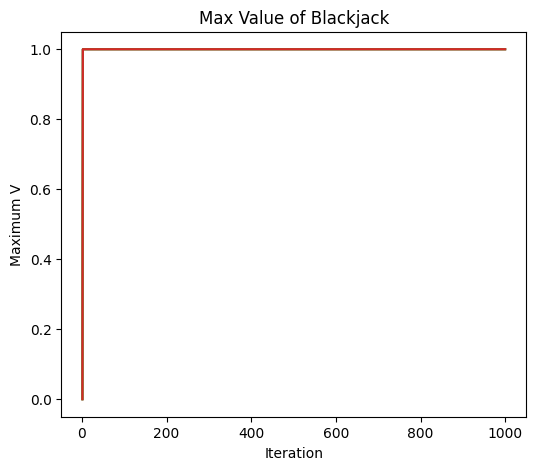

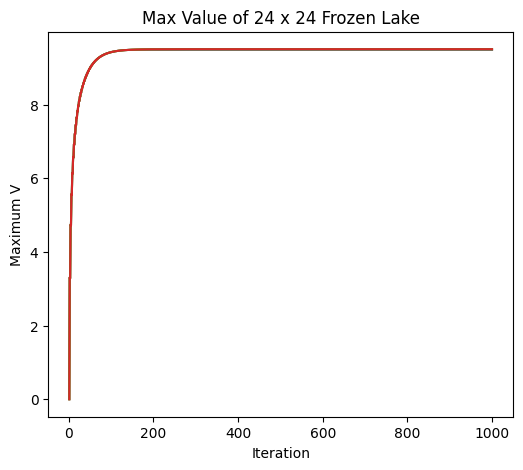

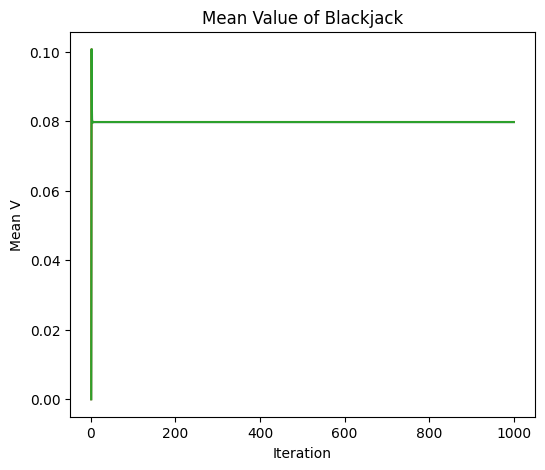

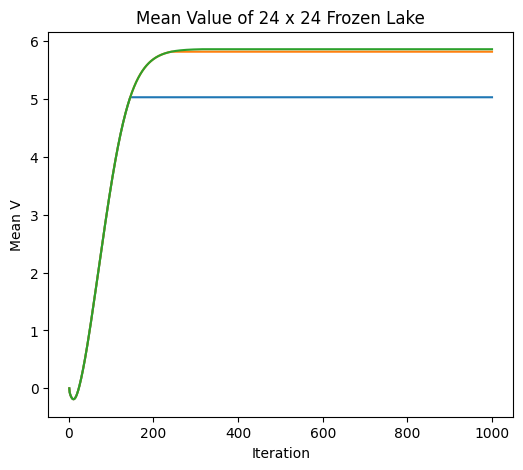

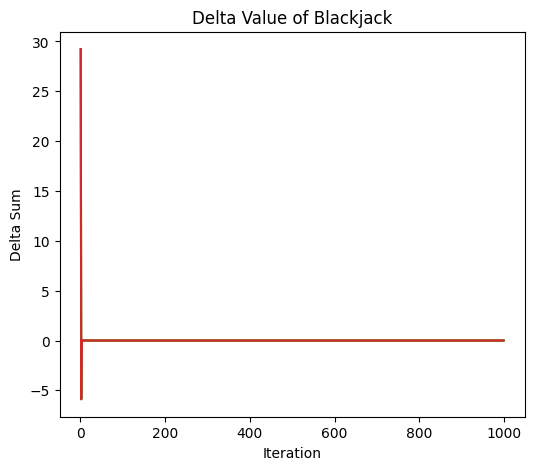

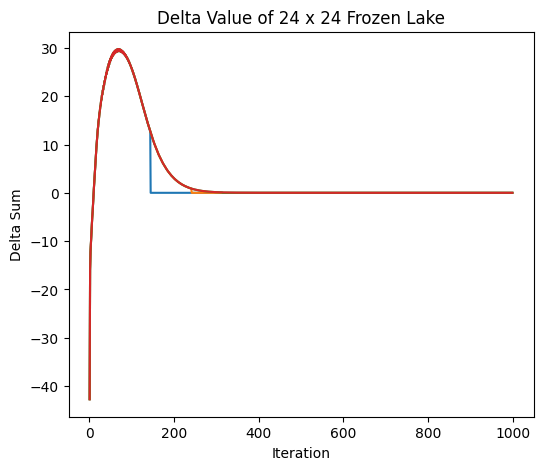

796

In [24]:
# Theta Convergence

convergence_plot_max_V_mult([vV_track1_theta0, vV_track1_theta1, vV_track1_theta2, vV_track1_theta3], "Max Value of Blackjack", plotSize=(6,5))
convergence_plot_max_V_mult([vV_track2_theta0, vV_track2_theta1, vV_track2_theta2, vV_track2_theta3], "Max Value of 24 x 24 Frozen Lake", plotSize=(6,5))

convergence_plot_mean_V_mult([vV_track1_theta0, vV_track1_theta1, vV_track1_theta2, vV_track1_theta3], "Mean Value of Blackjack", plotSize=(6,5))
convergence_plot_mean_V_mult([vV_track2_theta0, vV_track2_theta1, vV_track2_theta2, vV_track2_theta3], "Mean Value of 24 x 24 Frozen Lake", plotSize=(6,5))

convergence_plot_delta_V_mult([vV_track1_theta0, vV_track1_theta1, vV_track1_theta2, vV_track1_theta3], "Delta Value of Blackjack", plotSize=(6,5))
convergence_plot_delta_V_mult([vV_track2_theta0, vV_track2_theta1, vV_track2_theta2, vV_track2_theta3], "Delta Value of 24 x 24 Frozen Lake", plotSize=(6,5))

conv2_theta0 = convergence_plot_delta_V(vV_track2_theta0, "")
conv2_theta1 = convergence_plot_delta_V(vV_track2_theta1, "")
conv2_theta2 = convergence_plot_delta_V(vV_track2_theta2, "")
conv2_theta3 = convergence_plot_delta_V(vV_track2_theta3, "")

In [26]:
# Theta Convergence Viz

vpolicy2_theta0 = get_policy(vpi2_theta0, 576)
vpolicy2_theta1 = get_policy(vpi2_theta1, 576)
vpolicy2_theta2 = get_policy(vpi2_theta2, 576)
vpolicy2_theta3 = get_policy(vpi2_theta3, 576)

grid_values_heat_map_custom(vV2_theta0, "State values at Theta = 1e-1", size=(24, 24))
grid_values_heat_map_custom(vV2_theta1, "State values at Theta = 1e-2", size=(24, 24))
grid_values_heat_map_custom(vV2_theta2, "State values at Theta = 1e-3", size=(24, 24))
grid_values_heat_map_custom(vV2_theta3, "State values at Theta = 1e-10", size=(24, 24))

grid_world_policy_plot_custom(vV2, vpolicy2_theta0, "Policy as Theta = 1e-1", size=(24,24), holes=True)
grid_world_policy_plot_custom(vV2, vpolicy2_theta1, "Policy as Theta = 1e-2", size=(24,24), holes=True)
grid_world_policy_plot_custom(vV2, vpolicy2_theta2, "Policy as Theta = 1e-3", size=(24,24), holes=True)
grid_world_policy_plot_custom(vV2, vpolicy2_theta3, "Policy as Theta = 1e-10", size=(24,24), holes=True)

Text(0, 0.5, 'Number of Iterations before Convergence')

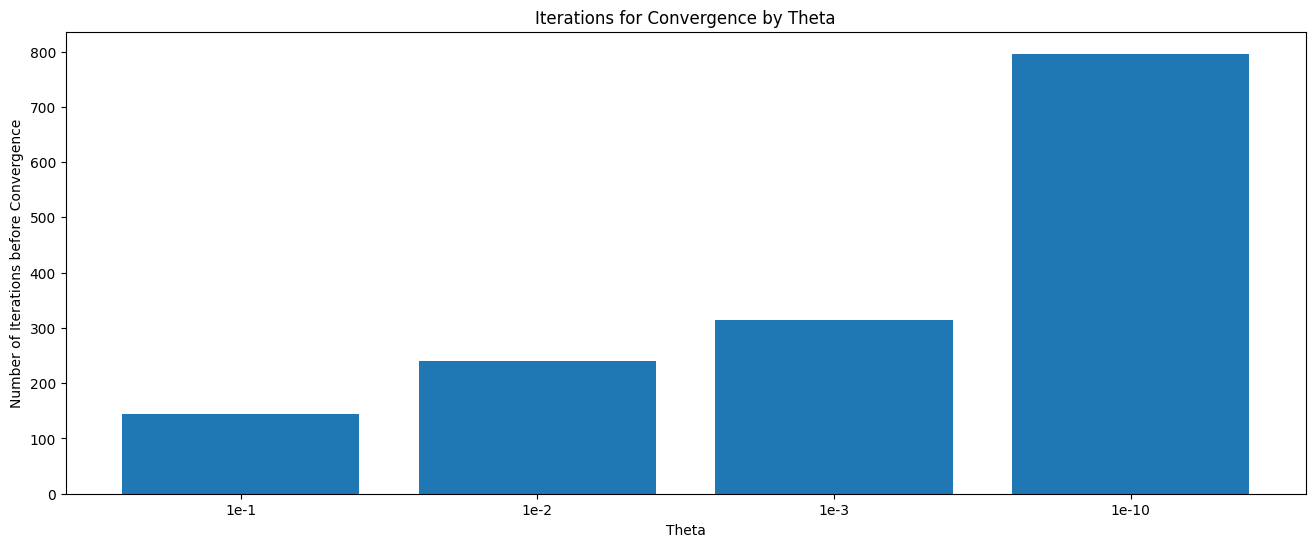

In [29]:
# Theta Convergence Iters Viz

convIters_theta = [conv2_theta0, conv2_theta1, conv2_theta2, conv2_theta3]

fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(111)
ax.bar(["1e-1", "1e-2", "1e-3", "1e-10"], convIters_theta)
ax.set_title("Iterations for Convergence by Theta")
ax.set_xlabel("Theta")
ax.set_ylabel("Number of Iterations before Convergence")

In [30]:
# Gamma Parameters

gammas = [1, 0.995, 0.99, 0.95, 0.9]

vV1_gamma0, vV_track1_gamma0, vpi1_gamma0  = Planner(env1.P).value_iteration(gamma=gammas[0])
vV1_gamma1, vV_track1_gamma1, vpi1_gamma1  = Planner(env1.P).value_iteration(gamma=gammas[1])
vV1_gamma2, vV_track1_gamma2, vpi1_gamma2  = Planner(env1.P).value_iteration(gamma=gammas[2])
vV1_gamma3, vV_track1_gamma3, vpi1_gamma3  = Planner(env1.P).value_iteration(gamma=gammas[3])
vV1_gamma4, vV_track1_gamma4, vpi1_gamma4  = Planner(env1.P).value_iteration(gamma=gammas[4])

vV2_gamma0, vV_track2_gamma0, vpi2_gamma0  = Planner(env2.P).value_iteration(gamma=gammas[0])
vV2_gamma1, vV_track2_gamma1, vpi2_gamma1  = Planner(env2.P).value_iteration(gamma=gammas[1])
vV2_gamma2, vV_track2_gamma2, vpi2_gamma2  = Planner(env2.P).value_iteration(gamma=gammas[2])
vV2_gamma3, vV_track2_gamma3, vpi2_gamma3  = Planner(env2.P).value_iteration(gamma=gammas[3])
vV2_gamma4, vV_track2_gamma4, vpi2_gamma4  = Planner(env2.P).value_iteration(gamma=gammas[4])

runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 3.99 seconds
runtime = 3.44 seconds
runtime = 3.03 seconds
runtime = 1.53 seconds
runtime = 0.91 seconds


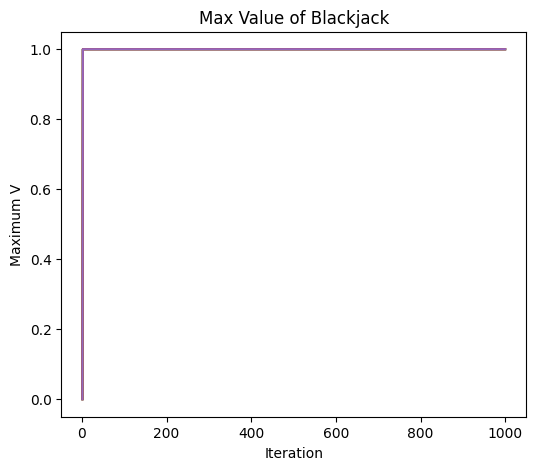

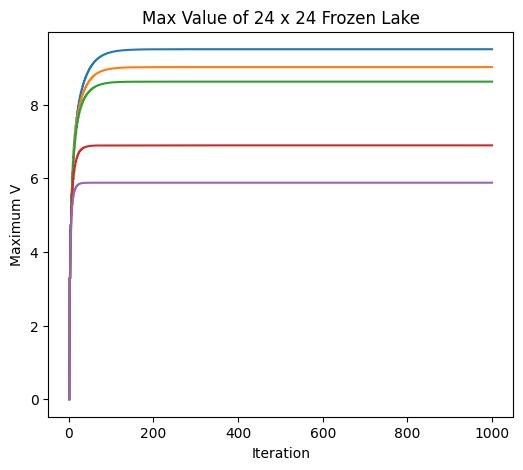

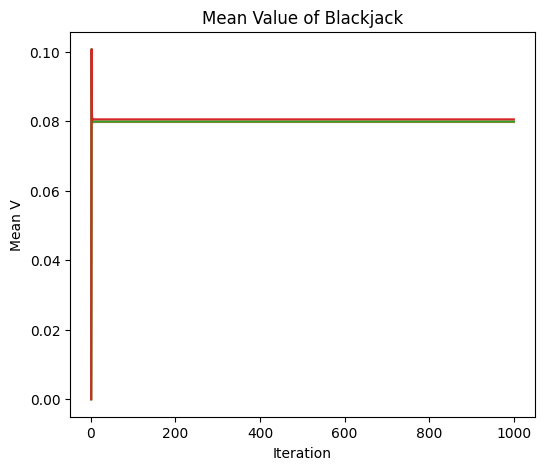

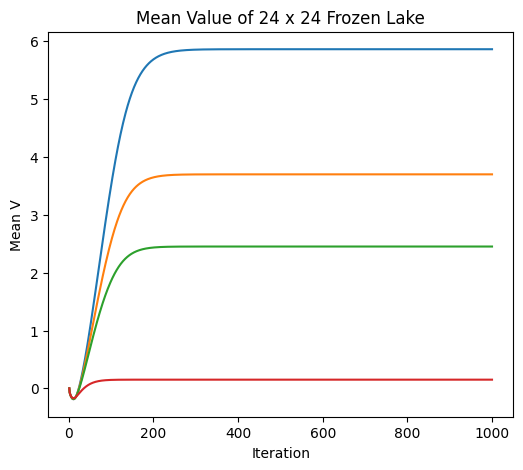

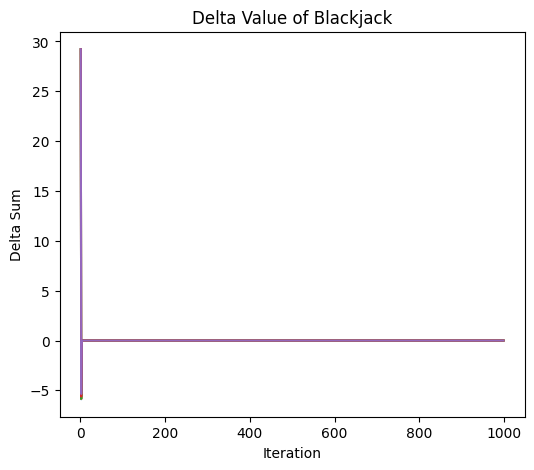

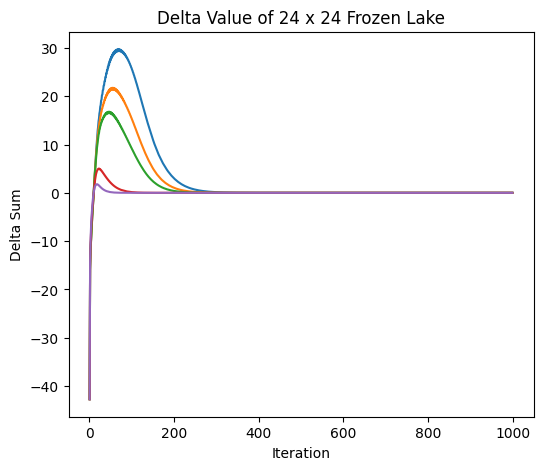

190

In [32]:
# Gamma Convergence

convergence_plot_max_V_mult([vV_track1_gamma0, vV_track1_gamma1, vV_track1_gamma2, vV_track1_gamma3, vV_track1_gamma4], "Max Value of Blackjack", plotSize=(6,5))
convergence_plot_max_V_mult([vV_track2_gamma0, vV_track2_gamma1, vV_track2_gamma2, vV_track2_gamma3, vV_track2_gamma4], "Max Value of 24 x 24 Frozen Lake", plotSize=(6,5))

convergence_plot_mean_V_mult([vV_track1_gamma0, vV_track1_gamma1, vV_track1_gamma2, vV_track1_gamma3, vV_track1_gamma4], "Mean Value of Blackjack", plotSize=(6,5))
convergence_plot_mean_V_mult([vV_track2_gamma0, vV_track2_gamma1, vV_track2_gamma2, vV_track2_gamma3, vV_track2_gamma4], "Mean Value of 24 x 24 Frozen Lake", plotSize=(6,5))

convergence_plot_delta_V_mult([vV_track1_gamma0, vV_track1_gamma1, vV_track1_gamma2, vV_track1_gamma3, vV_track1_gamma4], "Delta Value of Blackjack", plotSize=(6,5))
convergence_plot_delta_V_mult([vV_track2_gamma0, vV_track2_gamma1, vV_track2_gamma2, vV_track2_gamma3, vV_track2_gamma4], "Delta Value of 24 x 24 Frozen Lake", plotSize=(6,5))

conv2_gamma0 = convergence_plot_delta_V(vV_track2_gamma0, "")
conv2_gamma1 = convergence_plot_delta_V(vV_track2_gamma1, "")
conv2_gamma2 = convergence_plot_delta_V(vV_track2_gamma2, "")
conv2_gamma3 = convergence_plot_delta_V(vV_track2_gamma3, "")
conv2_gamma4 = convergence_plot_delta_V(vV_track2_gamma4, "")

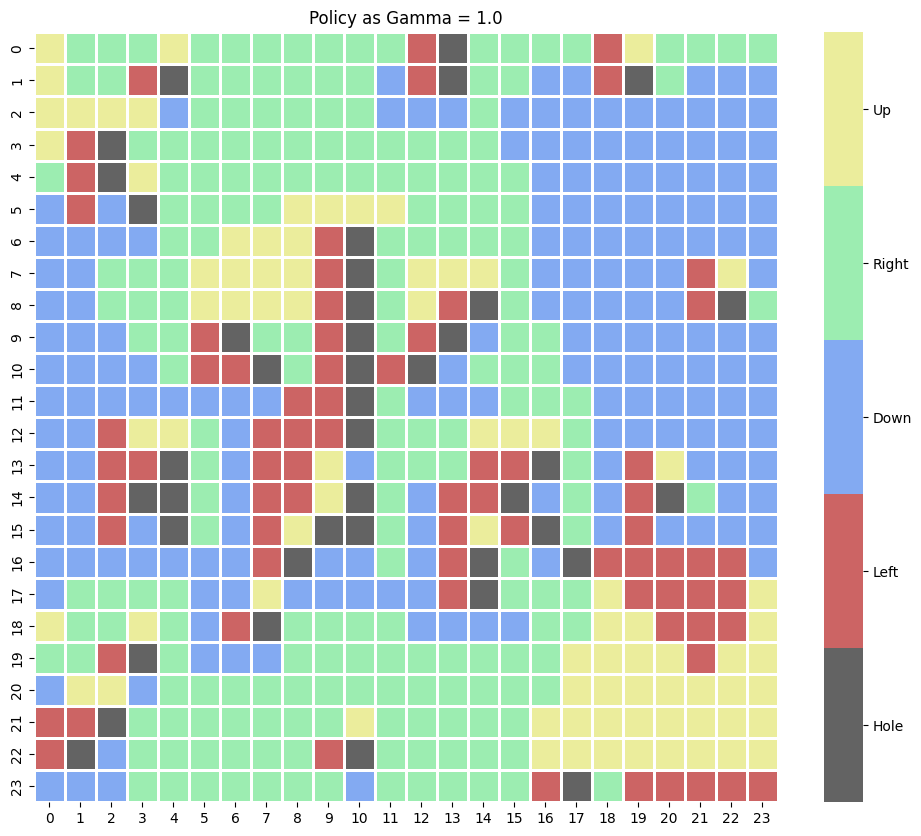

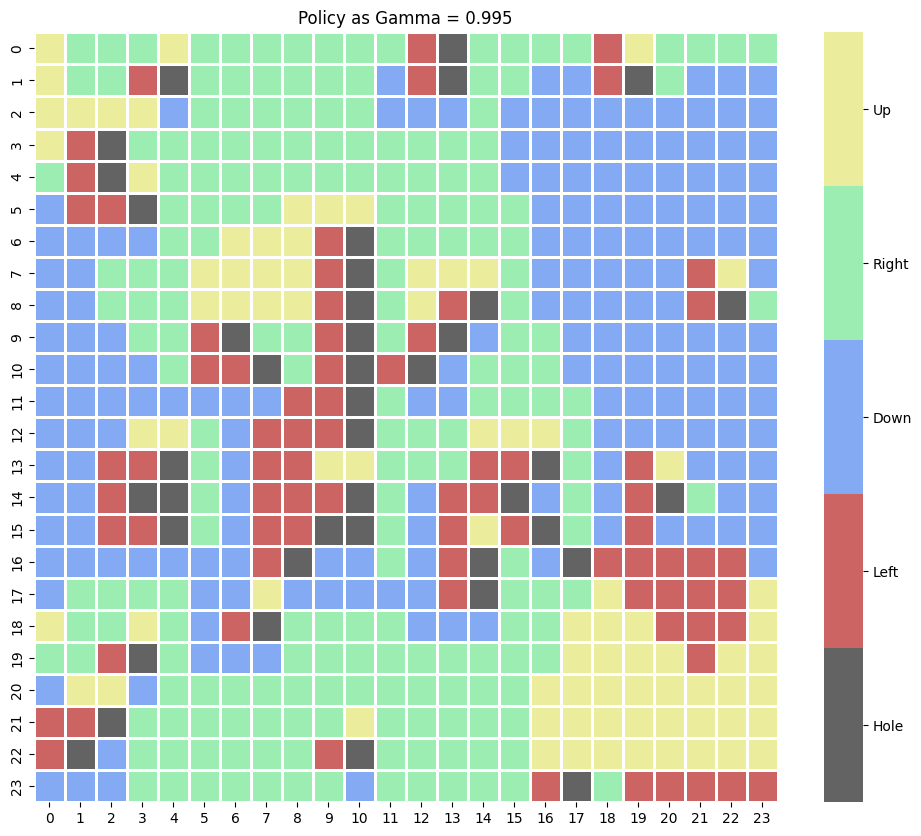

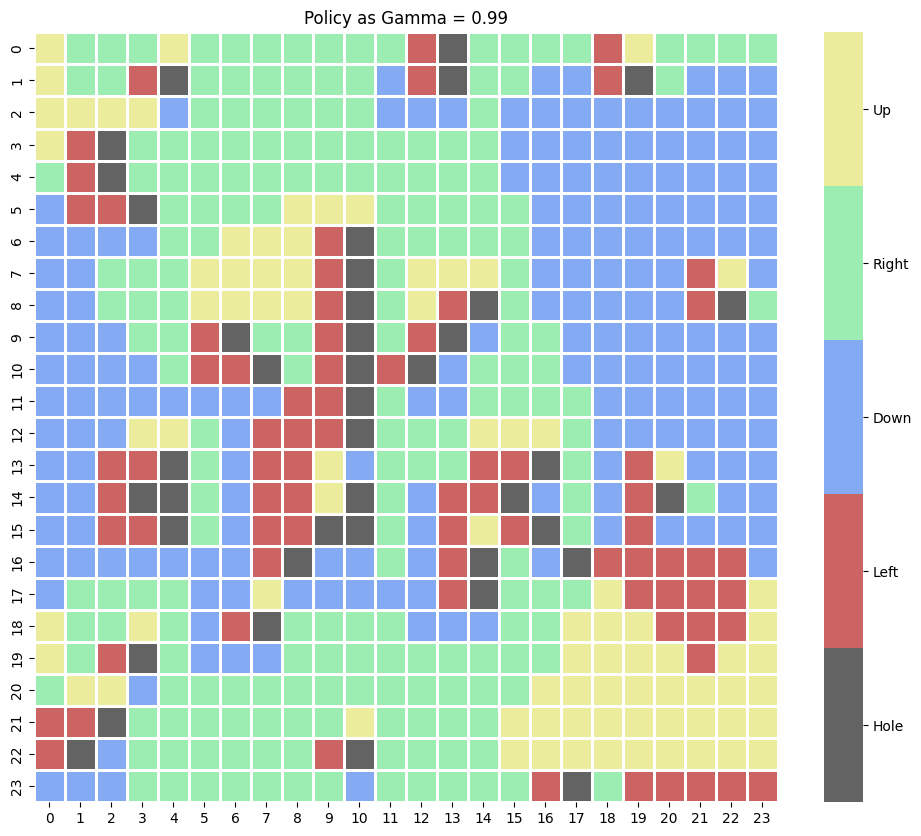

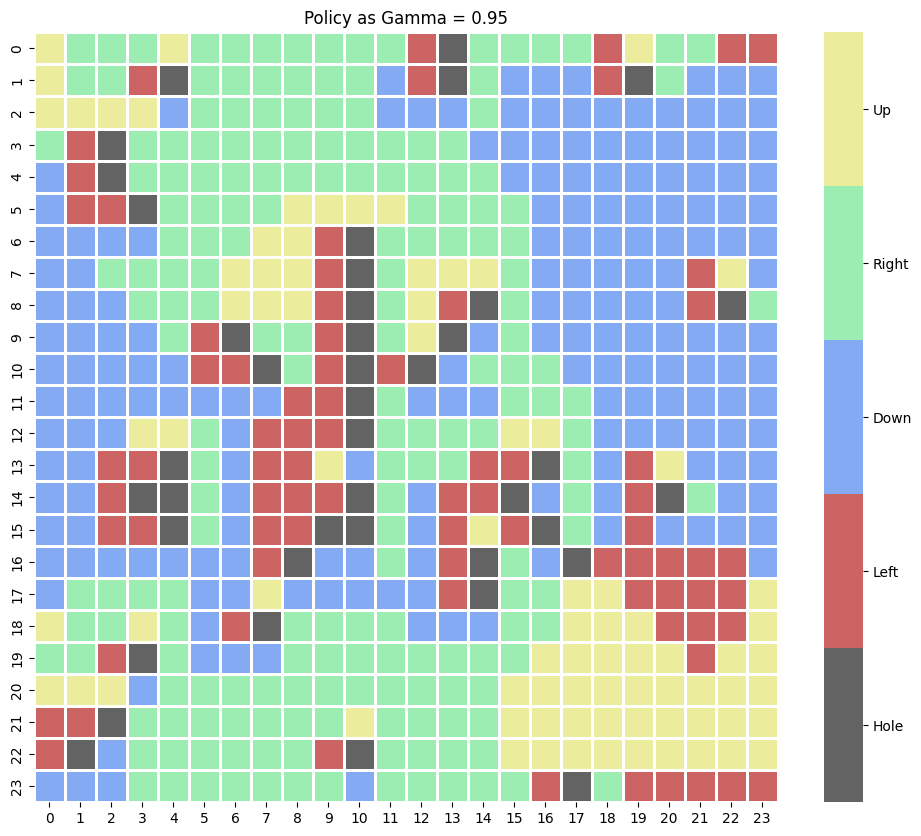

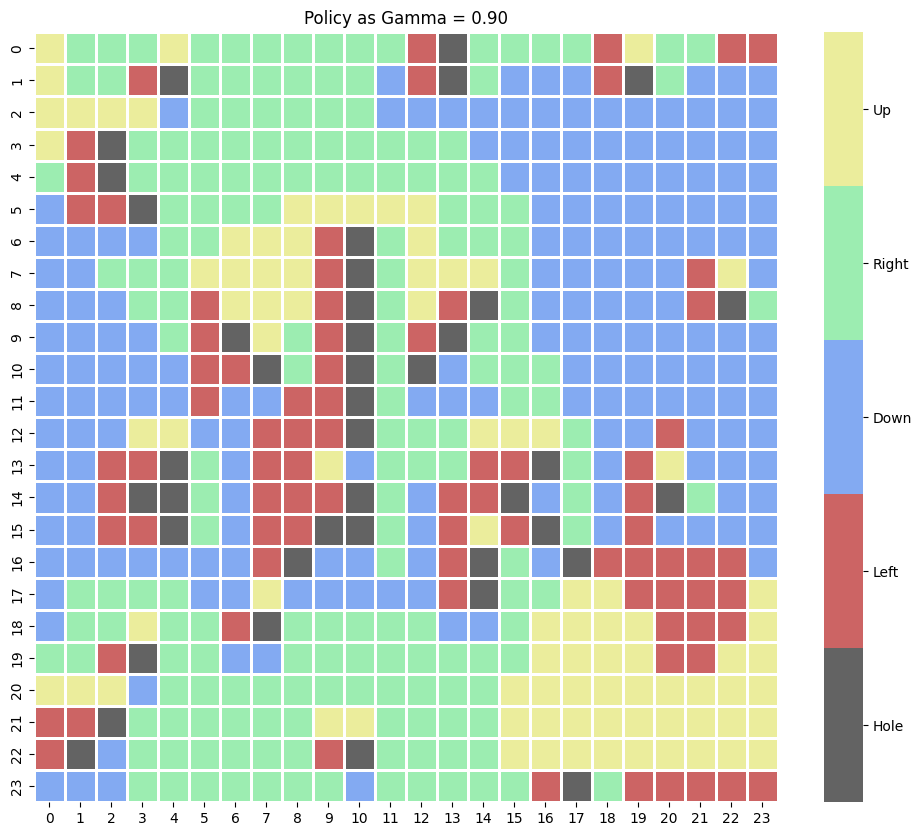

In [35]:
# Gamma Convergence Plots

vpolicy2_gamma0 = get_policy(vpi2_gamma0, 576)
vpolicy2_gamma1 = get_policy(vpi2_gamma1, 576)
vpolicy2_gamma2 = get_policy(vpi2_gamma2, 576)
vpolicy2_gamma3 = get_policy(vpi2_gamma3, 576)
vpolicy2_gamma4 = get_policy(vpi2_gamma4, 576)

grid_values_heat_map_custom(vV2_gamma0, "State values at Gamma = 1.0", size=(24, 24))
grid_values_heat_map_custom(vV2_gamma1, "State values at Gamma = 0.995", size=(24, 24))
grid_values_heat_map_custom(vV2_gamma2, "State values at Gamma = 0.99", size=(24, 24))
grid_values_heat_map_custom(vV2_gamma3, "State values at Gamma = 0.95", size=(24, 24))
grid_values_heat_map_custom(vV2_gamma4, "State values at Gamma = 0.90", size=(24, 24))

grid_world_policy_plot_custom(vV2, vpolicy2_gamma0, "Policy as Gamma = 1.0", size=(24,24), holes=True)
grid_world_policy_plot_custom(vV2, vpolicy2_gamma1, "Policy as Gamma = 0.995", size=(24,24), holes=True)
grid_world_policy_plot_custom(vV2, vpolicy2_gamma2, "Policy as Gamma = 0.99", size=(24,24), holes=True)
grid_world_policy_plot_custom(vV2, vpolicy2_gamma3, "Policy as Gamma = 0.95", size=(24,24), holes=True)
grid_world_policy_plot_custom(vV2, vpolicy2_gamma4, "Policy as Gamma = 0.90", size=(24,24), holes=True)

Text(0, 0.5, 'Number of Iterations before Convergence')

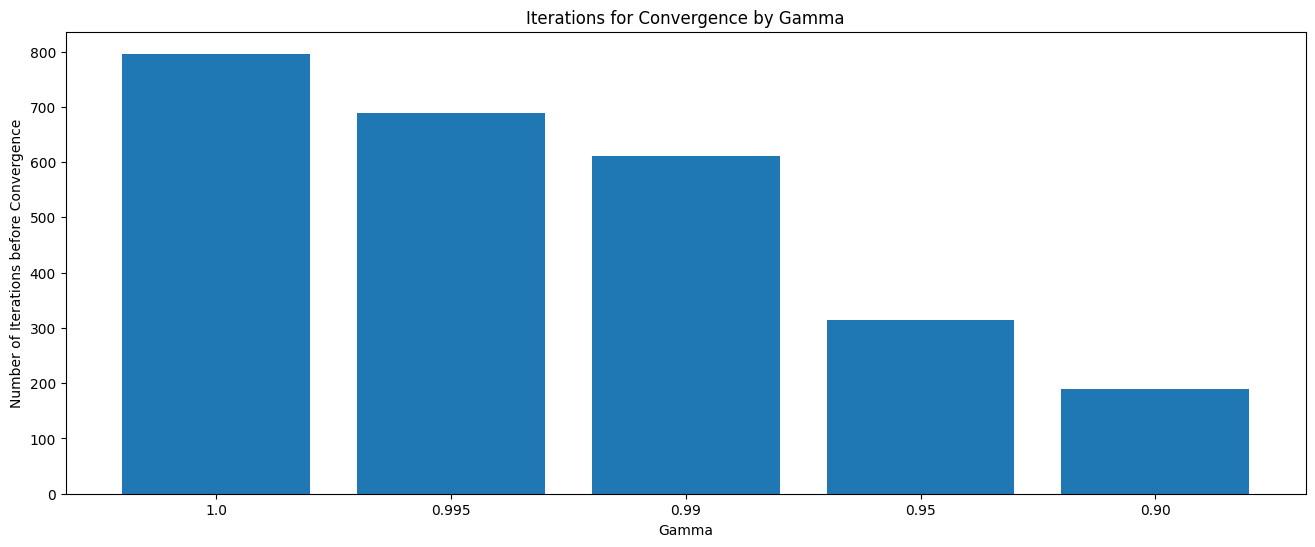

In [37]:
# Gamma Convergence Iters

convIters_gamma = [conv2_gamma0, conv2_gamma1, conv2_gamma2, conv2_gamma3, conv2_gamma4]

fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(111)
ax.bar(["1.0", "0.995", "0.99", "0.95", "0.90"], convIters_gamma)
ax.set_title("Iterations for Convergence by Gamma")
ax.set_xlabel("Gamma")
ax.set_ylabel("Number of Iterations before Convergence")

### Policy Iteration

In [38]:
# Policy Iteration

pV1, pV_track1, ppi1 = Planner(env1.P).policy_iteration()
pV2, pV_track2, ppi2 = Planner(env2.P).policy_iteration(n_iters=500)
pV2_med, pV_track2_med, ppi2_med = Planner(env2_med.P).policy_iteration()
pV2_small, pV_track2_small, ppi2_small = Planner(env2_small.P).policy_iteration()

runtime = 0.39 seconds
runtime = 296.18 seconds
runtime = 3.41 seconds
runtime = 0.17 seconds


In [39]:
# Get Policies

ppolicy1 = get_policy(ppi1, 290)
ppolicy2 = get_policy(ppi2, 576)
ppolicy2_med = get_policy(ppi2_med, 64)
ppolicy2_small = get_policy(ppi2_small, 16)

In [ ]:
# BJ Plots

blackjack_heat_map_custom(pV1, "State Values")
blackjack_policy_plot_custom(ppolicy1, "Policy")

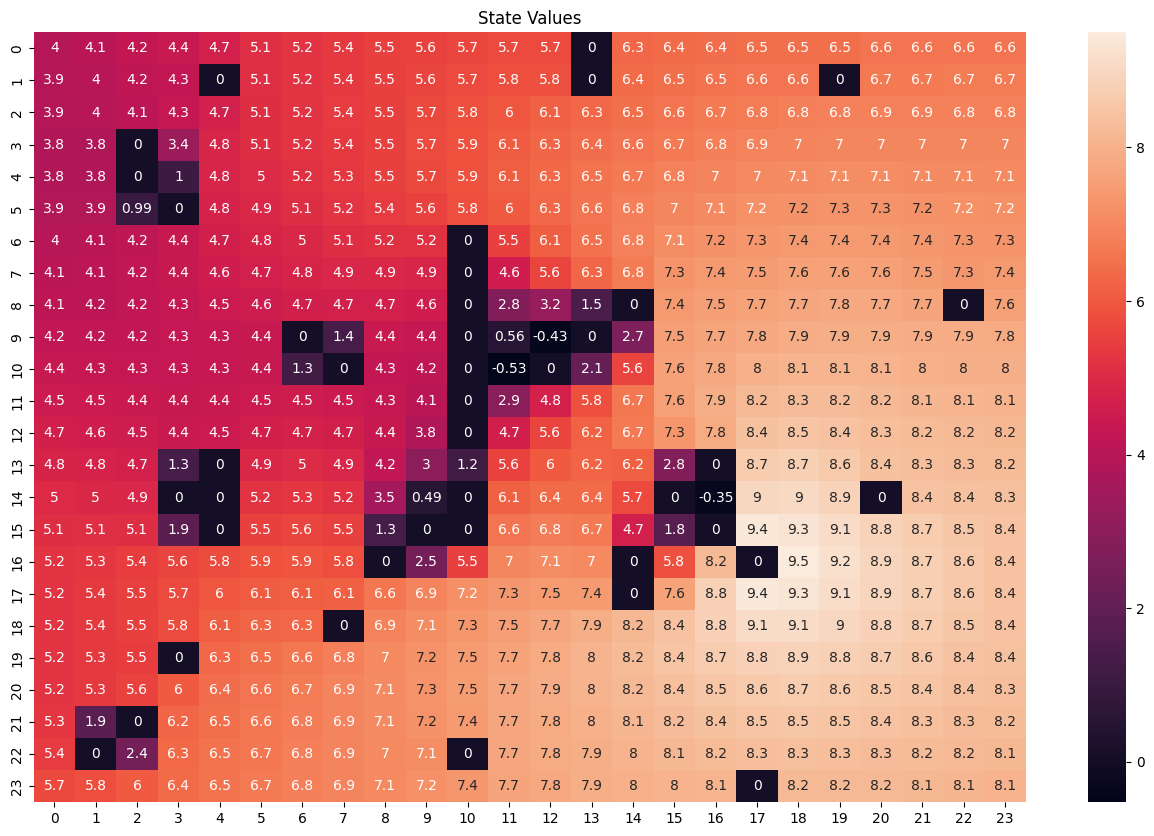

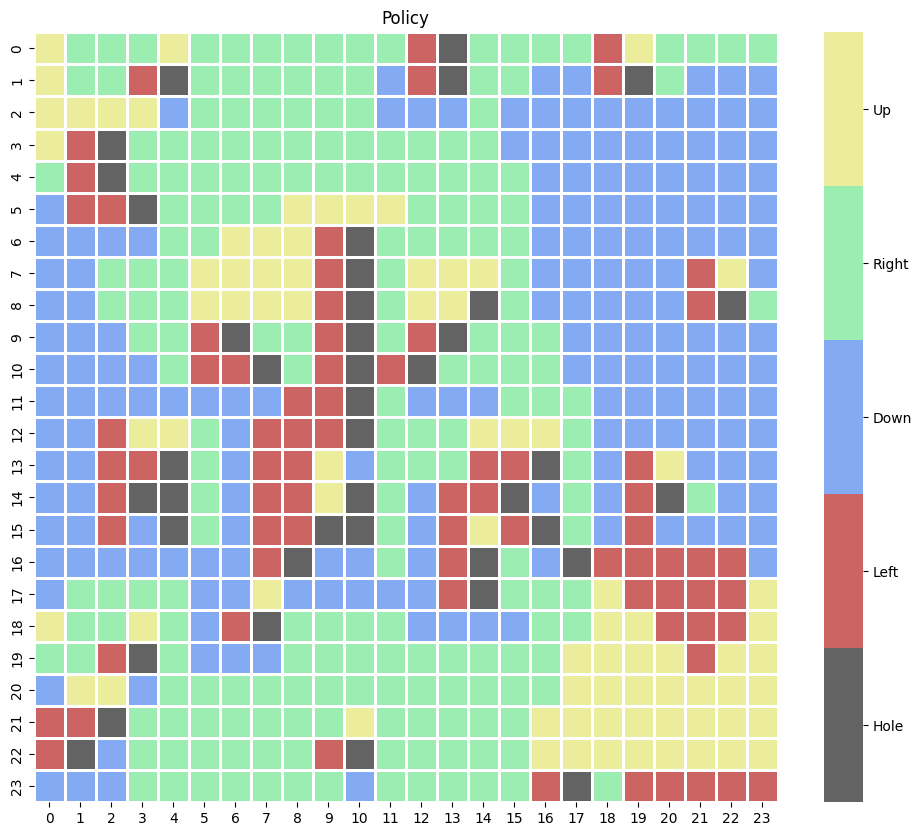

In [40]:
# FL Plots

grid_values_heat_map_custom(pV2, "State Values", (24, 24))
grid_world_policy_plot_custom(pV2, ppolicy2, "Policy", (24, 24), holes=True)

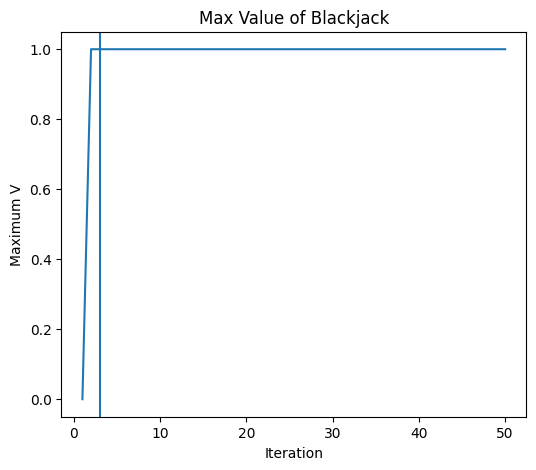

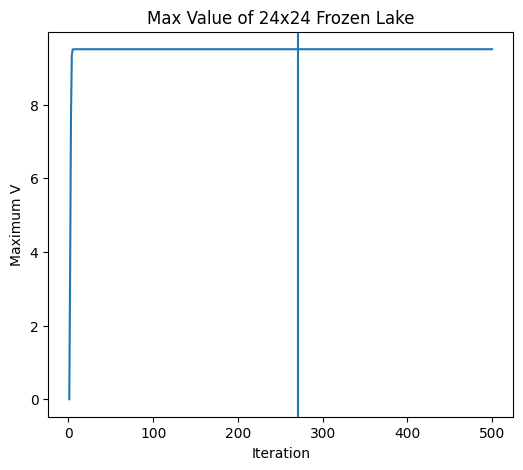

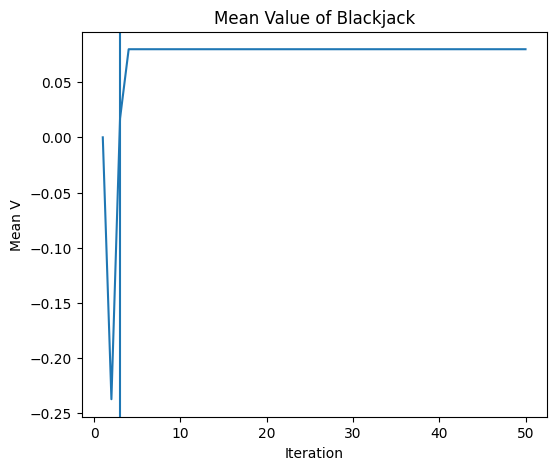

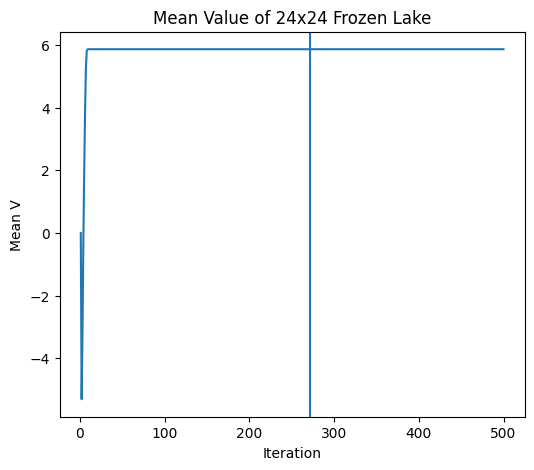

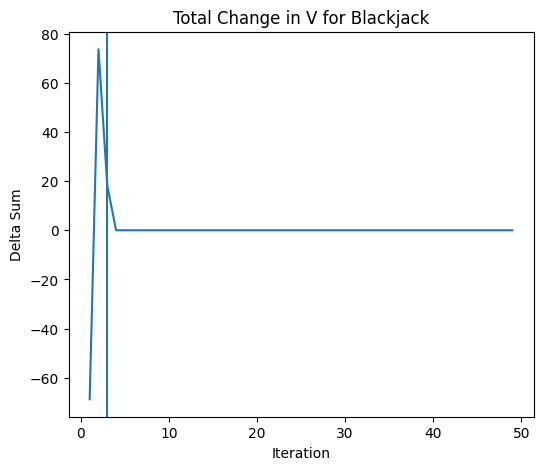

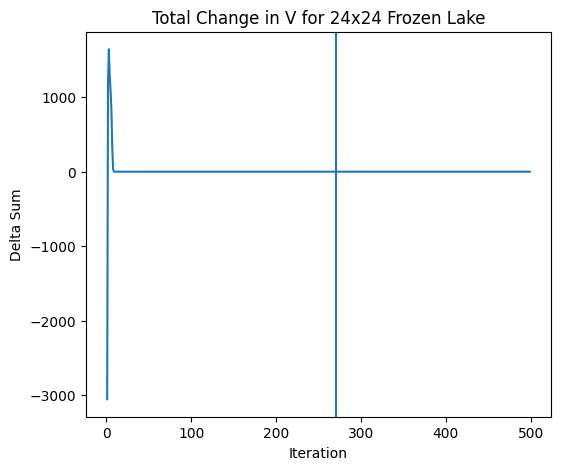

In [42]:
# Convergence Plots

pconvMax1 = convergence_plot_max_V(pV_track1, "Max Value of Blackjack", plotSize=(6,5))
pconvMax2 = convergence_plot_max_V(pV_track2, "Max Value of 24x24 Frozen Lake", plotSize=(6,5))

pconvMean1 = convergence_plot_mean_V(pV_track1, "Mean Value of Blackjack", plotSize=(6,5))
pconvMean2 = convergence_plot_mean_V(pV_track2, "Mean Value of 24x24 Frozen Lake", plotSize=(6,5))

pconvDelta1 = convergence_plot_delta_V(pV_track1, "Total Change in V for Blackjack", plotSize=(6, 5))
pconvDelta2 = convergence_plot_delta_V(pV_track2, "Total Change in V for 24x24 Frozen Lake", plotSize=(6, 5))

### Q Learning

In [75]:
# Q Learing

env1.env.reset()
env2.env.reset()
env2_med.env.reset()
env2_small.env.reset()

np.random.seed(1001001)
env1.env.np_random = np.random.default_rng(1001001)
env2.env.np_random = np.random.default_rng(1001001)
env2_med.env.np_random = np.random.default_rng(1001001)
env2_small.env.np_random = np.random.default_rng(1001001)

qQ2, qV2, qpi2, qQ_track2, qpi_track2 = RL(env2).q_learning(n_episodes=1000, gamma=1.0)

qQ2_med, qV2_med, qpi2_med, qQ_track2_med, qpi_track2_med = RL(env2_med).q_learning(gamma=1.0, epsilon_decay_ratio=1.0)
qQ2_small, qV2_small, qpi2_small, qQ_track2_small, qpi_track2_small = RL(env2_small).q_learning(gamma=1.0, epsilon_decay_ratio=1.0)

runtime = 76.68 seconds


runtime = 2.67 seconds


 37%|███▋      | 3692/10000 [00:04<00:08, 706.67it/s]C:\Users\ashi9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\algorithms\rl.py:180: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 15.99 seconds


runtime = 4.54 seconds


In [81]:
qQ1, qV1, qpi1, qQ_track1, qpi_track1 = RL(env1.env).q_learning(nS=env1.n_states, nA=env1.n_actions, convert_state_obs=env1.convert_state_obs, n_episodes=1000000)


runtime = 173.56 seconds


In [76]:
# Get Policies
qpolicy1 = get_policy(qpi1, 290)
qpolicy2 = get_policy(qpi2, 576)
qpolicy2_med = get_policy(qpi2_med, 64)
qpolicy2_small = get_policy(qpi2_small, 16)

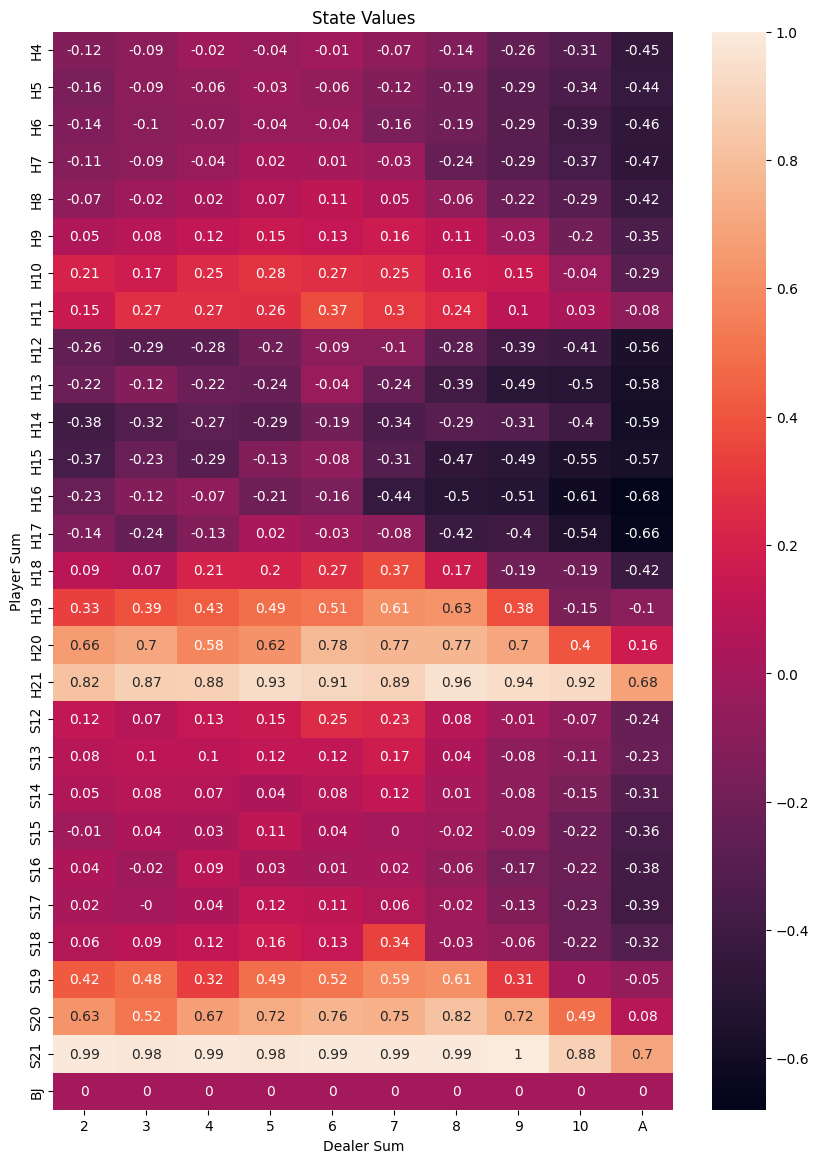

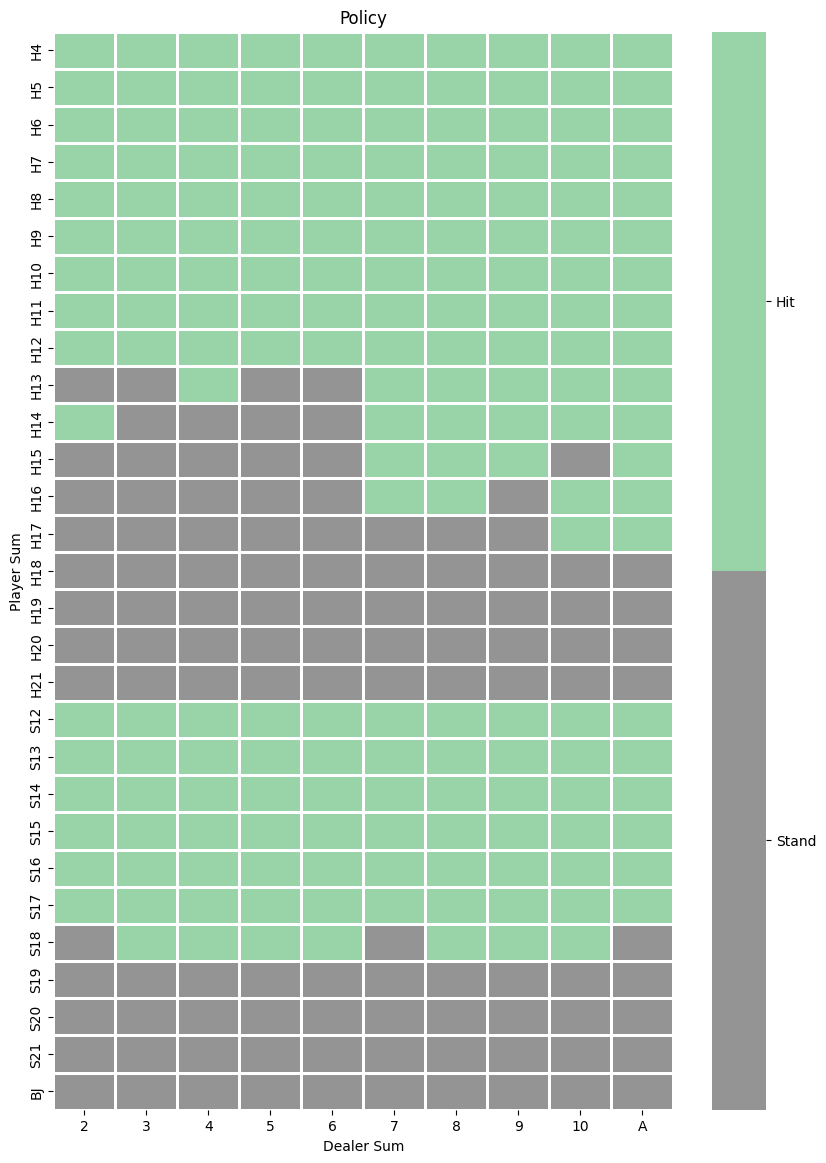

In [77]:
blackjack_heat_map_custom(qV1, "State Values")
blackjack_policy_plot_custom(qpolicy1, "Policy")

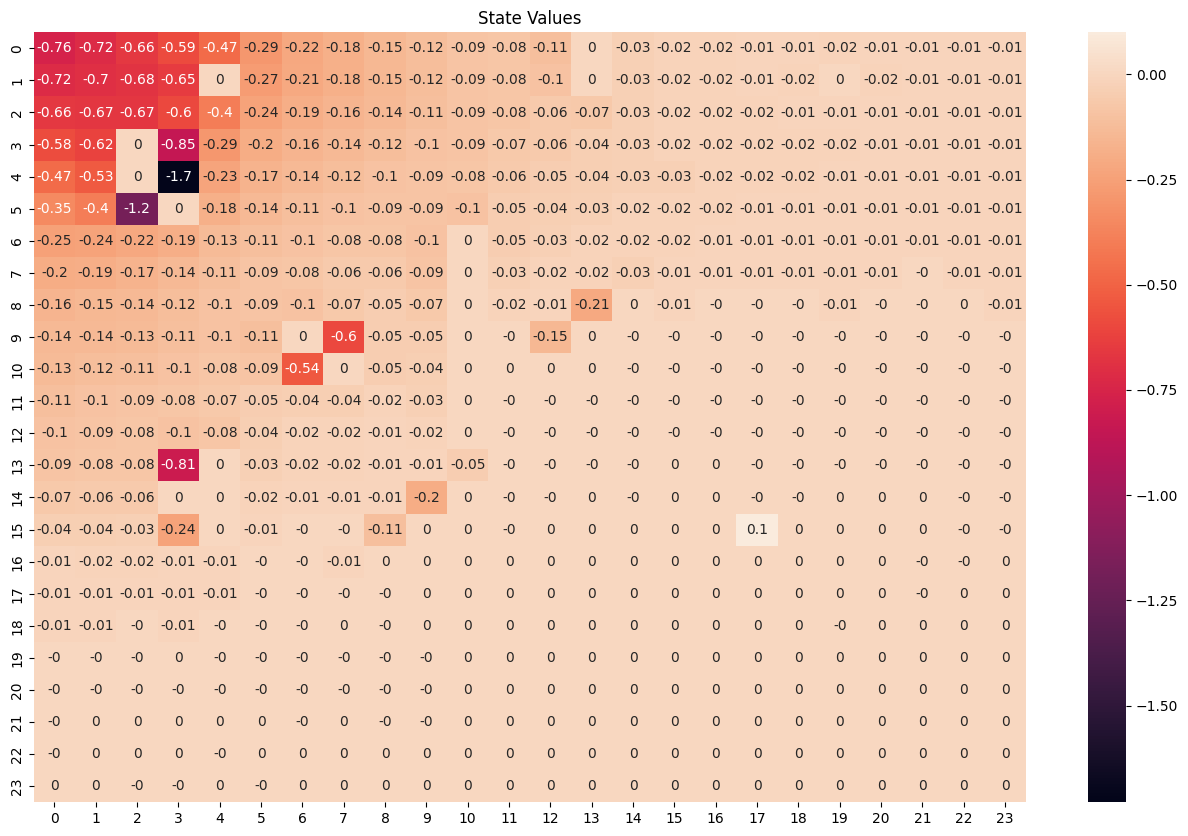

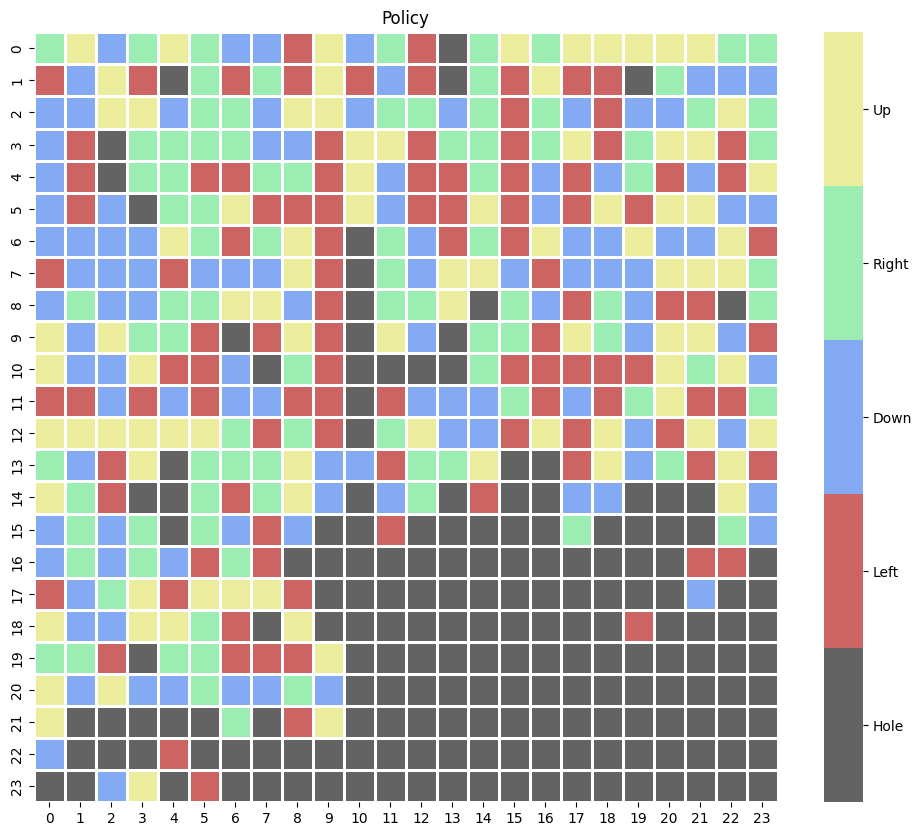

In [78]:
grid_values_heat_map_custom(qV2, "State Values", (24, 24))
grid_world_policy_plot_custom(qV2, qpolicy2, "Policy", (24, 24), holes=True)

In [79]:
qV_track1 = np.max(qQ_track1, axis=2)
qV_track2 = np.max(qQ_track2, axis=2)

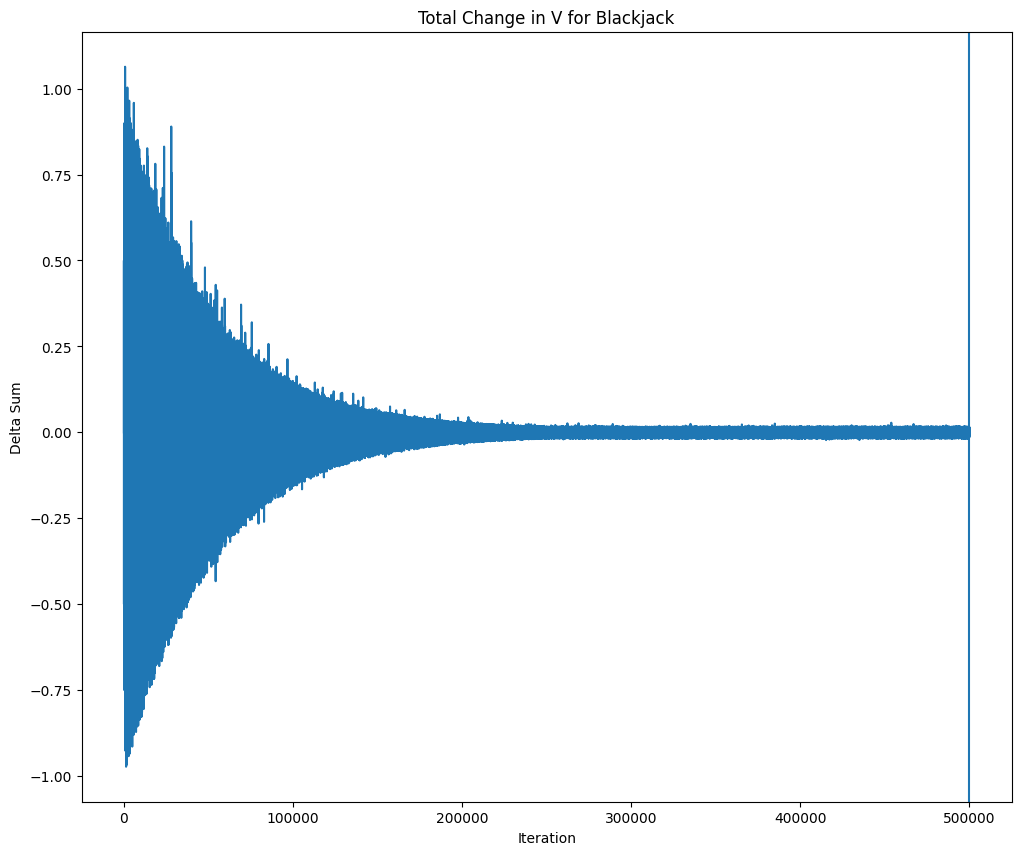

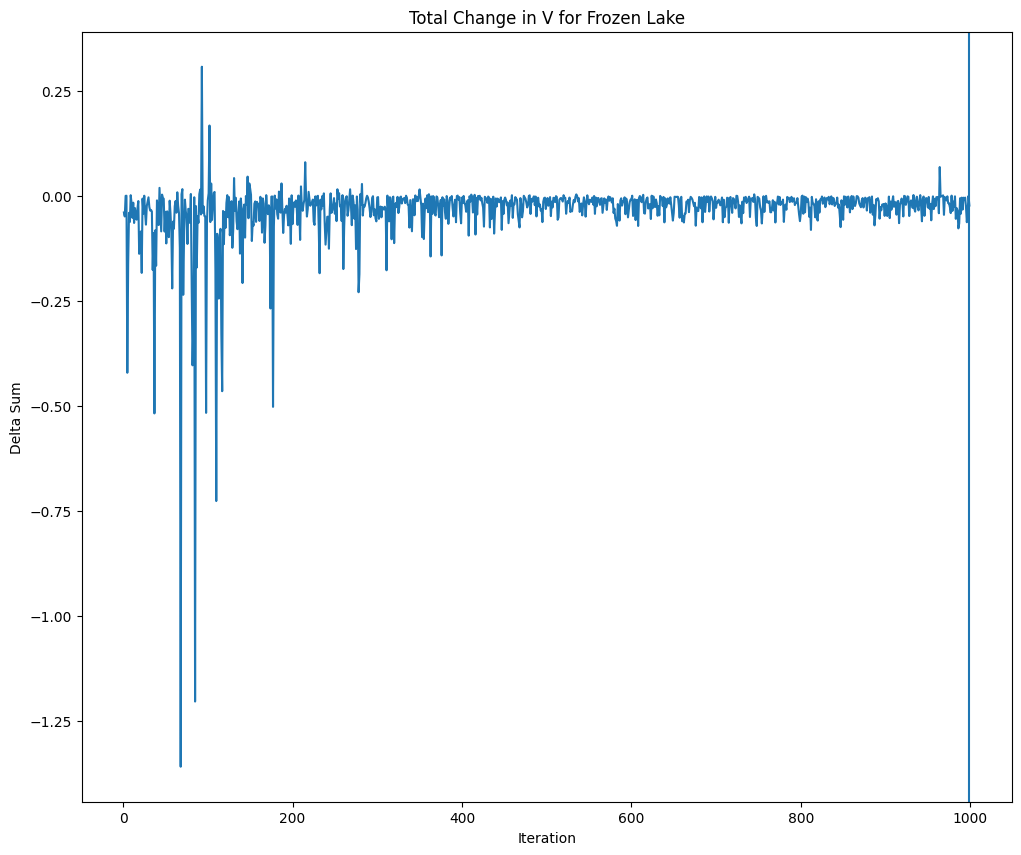

In [80]:
conv1_q = convergence_plot_delta_V(qV_track1, "Total Change in V for Blackjack")
conv2_q = convergence_plot_delta_V(qV_track2, "Total Change in V for Frozen Lake")